In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem


In [119]:
from rdkit import Chem
from rdkit.Chem.Descriptors import (
    ExactMolWt,
    HeavyAtomMolWt,
    MolWt,
    MaxPartialCharge,
    MinPartialCharge,
    NumRadicalElectrons,
    NumValenceElectrons,
)
from rdkit.Chem.Crippen import MolLogP
from rdkit.Chem.QED import default, weights_max, weights_none
from rdkit.Chem.Lipinski import (
    NHOHCount,
    NOCount,
    NumHAcceptors,
    NumHDonors,
    NumHeteroatoms,
    NumRotatableBonds,
    RingCount,
)

In [120]:
df = pd.read_csv("data/processed/basic_data.csv")
df.head()
df.columns

Index(['cid', 'smiles', 'action', 'action_gen'], dtype='object')

In [121]:
df

,cid,smiles,action,action_gen
0,2159,CCN1CCCC1CNC(=O)C2=CC(=C(C=C2OC)N)S(=O)(=O)CC,AGONIST,AGONIST
1,2160,CN(C)CCC=C1C2=CC=CC=C2CCC3=CC=CC=C31,BINDER,OTHER
2,2562,CCN(CC)CCOCCOC(=O)C1(CCCC1)C2=CC=CC=C2,ANTAGONIST,ANTAGONIST
3,3345,CCC(=O)N(C1CCN(CC1)CCC2=CC=CC=C2)C3=CC=CC=C3,AGONIST,AGONIST
4,3821,CNC1(CCCCC1=O)C2=CC=CC=C2Cl,BINDER,OTHER
...,...,...,...,...
166,132990963,C1CCC(CC1)N2CCN(CC2)C(CC3=CC=CC=C3)C4=CC=C(C=C4)F,AGONIST,AGONIST
167,132990975,C1CCC(CC1)N2CCN(CC2)C(CC3=CC=CC=C3)C4=CC=CC=C4F,AGONIST,AGONIST
168,134156377,CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)OC)O[C...,AGONIST,AGONIST
169,137434175,CCC1=CC2=C(C(=C(N=C2C(=C1)F)N3CCC(CC3)NC4CCOCC...,ANTAGONIST,ANTAGONIST


In [122]:
df['mol'] = df['smiles'].apply(lambda x : Chem.MolFromSmiles(x))
df

,cid,smiles,action,action_gen,mol
0,2159,CCN1CCCC1CNC(=O)C2=CC(=C(C=C2OC)N)S(=O)(=O)CC,AGONIST,AGONIST,<rdkit.Chem.rdchem.Mol object at 0x0000029F48A...
1,2160,CN(C)CCC=C1C2=CC=CC=C2CCC3=CC=CC=C31,BINDER,OTHER,<rdkit.Chem.rdchem.Mol object at 0x0000029F48A...
2,2562,CCN(CC)CCOCCOC(=O)C1(CCCC1)C2=CC=CC=C2,ANTAGONIST,ANTAGONIST,<rdkit.Chem.rdchem.Mol object at 0x0000029F48A...
3,3345,CCC(=O)N(C1CCN(CC1)CCC2=CC=CC=C2)C3=CC=CC=C3,AGONIST,AGONIST,<rdkit.Chem.rdchem.Mol object at 0x0000029F48A...
4,3821,CNC1(CCCCC1=O)C2=CC=CC=C2Cl,BINDER,OTHER,<rdkit.Chem.rdchem.Mol object at 0x0000029F48A...
...,...,...,...,...,...
166,132990963,C1CCC(CC1)N2CCN(CC2)C(CC3=CC=CC=C3)C4=CC=C(C=C4)F,AGONIST,AGONIST,<rdkit.Chem.rdchem.Mol object at 0x0000029F48A...
167,132990975,C1CCC(CC1)N2CCN(CC2)C(CC3=CC=CC=C3)C4=CC=CC=C4F,AGONIST,AGONIST,<rdkit.Chem.rdchem.Mol object at 0x0000029F48A...
168,134156377,CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)OC)O[C...,AGONIST,AGONIST,<rdkit.Chem.rdchem.Mol object at 0x0000029F48A...
169,137434175,CCC1=CC2=C(C(=C(N=C2C(=C1)F)N3CCC(CC3)NC4CCOCC...,ANTAGONIST,ANTAGONIST,<rdkit.Chem.rdchem.Mol object at 0x0000029F48A...


In [123]:
df['MolWt'] = df['mol'].apply(lambda m :MolWt(m))
df['ExactMolWt'] = df['mol'].apply(lambda m :ExactMolWt(m))
df['HeavyAtomMolWt'] = df['mol'].apply(lambda m :HeavyAtomMolWt(m))
df['MaxPartialCharge'] = df['mol'].apply(lambda m :MaxPartialCharge(m))
df['MinPartialCharge'] = df['mol'].apply(lambda m :MinPartialCharge(m))
df['NumRadicalElectrons'] = df['mol'].apply(lambda m :NumRadicalElectrons(m))
df['NumValenceElectrons'] = df['mol'].apply(lambda m :NumValenceElectrons(m))
df['MolLogP'] = df['mol'].apply(lambda m :MolLogP(m))
df['weights_max'] = df['mol'].apply(lambda m :weights_max(m))
df['default'] = df['mol'].apply(lambda m :default(m))
df['weights_none'] = df['mol'].apply(lambda m :weights_none(m))
df['NHOHCount'] = df['mol'].apply(lambda m :NHOHCount(m))
df['NOCount'] = df['mol'].apply(lambda m :NOCount(m))
df['NumHAcceptors'] = df['mol'].apply(lambda m :NumHAcceptors(m))
df['NumHDonors'] = df['mol'].apply(lambda m :NumHDonors(m))
df['NumHeteroatoms'] = df['mol'].apply(lambda m :NumHeteroatoms(m))
df['NumRotatableBonds'] = df['mol'].apply(lambda m :NumRotatableBonds(m))
df['RingCount'] = df['mol'].apply(lambda m :RingCount(m))

In [124]:
df.drop('NumRadicalElectrons',axis=1, inplace=True)

In [125]:
df_moldesc = df.iloc[:, 3:]
df_moldesc

,action_gen,mol,MolWt,ExactMolWt,HeavyAtomMolWt,MaxPartialCharge,MinPartialCharge,NumValenceElectrons,MolLogP,weights_max,default,weights_none,NHOHCount,NOCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,RingCount
0,AGONIST,<rdkit.Chem.rdchem.Mol object at 0x0000029F48A...,369.487,369.172227,342.271,0.254647,-0.495842,140,1.28510,0.691436,0.702317,0.687720,3,7,6,2,8,7,2
1,OTHER,<rdkit.Chem.rdchem.Mol object at 0x0000029F48A...,277.411,277.183050,254.227,0.001014,-0.309092,108,4.16860,0.836041,0.813678,0.620380,0,1,1,0,1,3,3
2,ANTAGONIST,<rdkit.Chem.rdchem.Mol object at 0x0000029F48A...,333.472,333.230394,302.224,0.316138,-0.462565,134,3.40000,0.428556,0.485829,0.609808,0,4,4,0,4,10,2
3,AGONIST,<rdkit.Chem.rdchem.Mol object at 0x0000029F48A...,336.479,336.220164,308.255,0.226459,-0.309290,132,4.13670,0.786816,0.791487,0.794927,0,3,2,0,3,6,3
4,OTHER,<rdkit.Chem.rdchem.Mol object at 0x0000029F48A...,237.730,237.092042,221.602,0.156947,-0.304286,86,2.89780,0.854116,0.857157,0.864922,1,2,2,1,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,AGONIST,<rdkit.Chem.rdchem.Mol object at 0x0000029F48A...,366.524,366.247127,335.276,0.122729,-0.297847,144,5.05980,0.749976,0.729695,0.670214,0,2,2,0,3,5,4
167,AGONIST,<rdkit.Chem.rdchem.Mol object at 0x0000029F48A...,366.524,366.247127,335.276,0.127497,-0.297847,144,5.05980,0.749976,0.729695,0.670214,0,2,2,0,3,5,4
168,AGONIST,<rdkit.Chem.rdchem.Mol object at 0x0000029F48A...,485.486,485.189711,454.238,0.335427,-0.492857,190,-1.83870,0.427268,0.373375,0.220231,8,12,8,4,12,4,5
169,ANTAGONIST,<rdkit.Chem.rdchem.Mol object at 0x0000029F48A...,453.562,453.254003,421.306,0.261461,-0.381329,176,4.34054,0.656867,0.615779,0.578615,1,7,7,1,8,5,5


In [126]:
# df_moldesc.set_index('action_gen', inplace=True)
# df_moldesc.to_csv('data/processed/moldesc.csv')
# df_moldesc.reset_index()

<AxesSubplot:>

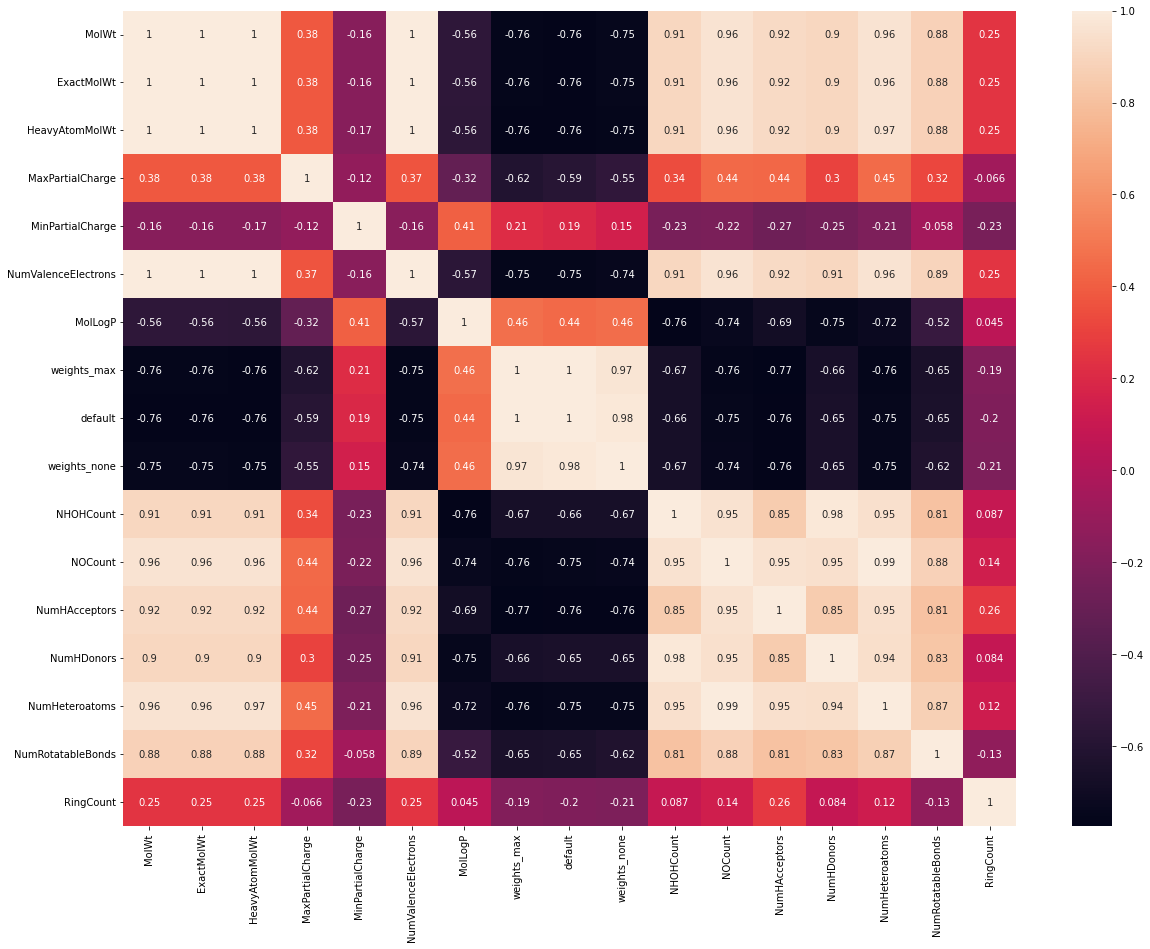

In [127]:
f, ax = plt.subplots(figsize=(20, 15))
correlation_plt = df_moldesc.iloc[:, 2:].corr()
sns.heatmap(correlation_plt, annot=True)

## ANOVA f_classif for feature selection

In [128]:
from sklearn.preprocessing import StandardScaler

X = df_moldesc.iloc[:,2: ]
y = df_moldesc.iloc[:, 0 ]

X_col = X.columns
# X = StandardScaler().fit_transform(X)

from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
fs = SelectKBest(score_func=f_classif, k=5)
X_selected = fs.fit_transform(X, y)
# X_selected

fs.get_feature_names_out(X_col)


array(['MaxPartialCharge', 'MinPartialCharge', 'MolLogP', 'NumHAcceptors',
       'RingCount'], dtype=object)

### TSNE

c:\Users\fongm\Anaconda3\envs\m2vec\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\fongm\Anaconda3\envs\m2vec\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


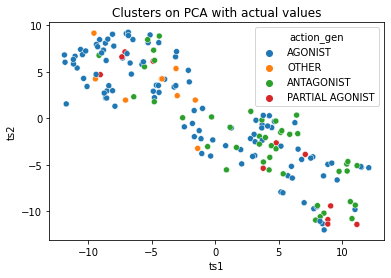

In [129]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_selected)

tsne_results = pd.DataFrame(tsne_results, columns=['ts1', 'ts2'])
sns.scatterplot(x='ts1', y="ts2", hue=df['action_gen'], data=tsne_results)
plt.title('Clusters on PCA with actual values')
plt.show()

### LDA

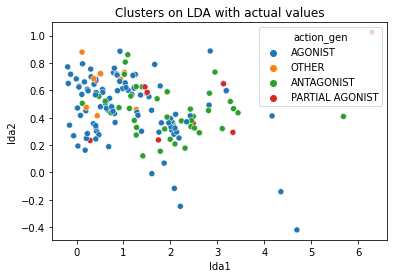

In [130]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split

X_selected = pd.concat([pd.DataFrame(X_selected), pd.DataFrame(y)], axis=1)
# normal LDA 
n_comp = 2
np.random.seed(42)
# lda = LDA(n_components=n_comp).fit(X_selected.iloc[:, :-1], X_selected.iloc[:, -1])

# normal LDA with partial training set to prevent overfitting
# df_sample = X_selected.sample(n=140)
# lda = LDA(n_components=n_comp).fit(df_sample.iloc[:, :-1], df_sample.iloc[:, -1])
# X_train, X_test, y_train, y_test = train_test_split(X_selected.iloc[:, :-1], X_selected.iloc[:, -1], 
#                                                 train_size=0.6, random_state=42)
# lda = LDA(n_components=n_comp).fit(X_train, y_train)

# solve generalized eigenvalue problem
X_train, X_test, y_train, y_test = train_test_split(X_selected.iloc[:, :-1], X_selected.iloc[:, -1], 
                                                train_size=0.6, random_state=42)
lda = LDA(n_components=n_comp, solver='eigen', shrinkage=0.1).fit(X_train, y_train)

X_selected.drop("action_gen", axis=1, inplace=True)
lda_results = lda.transform(X_selected)

lda_results = pd.DataFrame(lda_results, columns=['lda' + str(i) for i in range(1, n_comp+1)])
sns.scatterplot(x='lda1', y="lda2", hue=df['action_gen'], data=lda_results)
plt.title('Clusters on LDA with actual values')
plt.show()

In [131]:
print('pairing_score: ', rand_score(y_test, lda.predict(X_test)))
print(classification_report(y_test, lda.predict(X_test)))

pairing_score:  0.505541346973572
                 precision    recall  f1-score   support

        AGONIST       0.65      0.95      0.77        42
     ANTAGONIST       0.50      0.17      0.25        18
          OTHER       0.00      0.00      0.00         5
PARTIAL AGONIST       0.00      0.00      0.00         4

       accuracy                           0.62        69
      macro avg       0.29      0.28      0.25        69
   weighted avg       0.52      0.62      0.53        69



c:\Users\fongm\Anaconda3\envs\m2vec\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\fongm\Anaconda3\envs\m2vec\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\fongm\Anaconda3\envs\m2vec\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [132]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import rand_score

## LDA

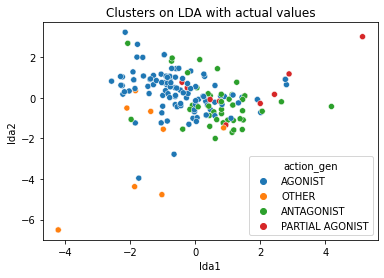

In [133]:
# df_moldesc_X = pd.DataFrame(X_selected) 
df_moldesc_X = df_moldesc.iloc[:, 2:]

# scaler = StandardScaler()
# df_moldesc_scaled = pd.DataFrame(scaler.fit_transform(df_moldesc_X))

df_moldesc_scaled = pd.concat([df_moldesc_X, pd.DataFrame(y)], axis=1)

# normal LDA 
n_comp = 2
# lda = LDA(n_components=n_comp).fit(df_moldesc_scaled.iloc[:, :-1], df_moldesc_scaled.iloc[:, -1])

# normal LDA with partial training set to prevent overfitting
# df_sample = df_moldesc_scaled.sample(n=140)
# lda = LDA(n_components=n_comp).fit(df_sample.iloc[:, :-1], df_sample.iloc[:, -1])
X_train, X_test, y_train, y_test = train_test_split(df_moldesc_scaled.iloc[:, :-1], df_moldesc_scaled.iloc[:, -1], 
                                                train_size=0.6, random_state=42)
lda = LDA(n_components=n_comp).fit(X_train, y_train)

# solve generalized eigenvalue problem
# X_train, X_test, y_train, y_test = train_test_split(df_moldesc_scaled.iloc[:, :-1], df_moldesc_scaled.iloc[:, -1], 
#                                                 train_size=0.6, random_state=42)
# lda = LDA(n_components=n_comp, solver='eigen', shrinkage=0.1).fit(X_train, y_train)

df_moldesc_scaled.drop("action_gen", axis=1, inplace=True)
lda_results = lda.transform(df_moldesc_scaled)

lda_results = pd.DataFrame(lda_results, columns=['lda' + str(i) for i in range(1, n_comp+1)])
sns.scatterplot(x='lda1', y="lda2", hue=df['action_gen'], data=lda_results)
plt.title('Clusters on LDA with actual values')
plt.show()



In [134]:
print('pairing_score: ', rand_score(y_test, lda.predict(X_test)))
print(classification_report(y_test, lda.predict(X_test)))

pairing_score:  0.6146632566069906
                 precision    recall  f1-score   support

        AGONIST       0.74      0.81      0.77        42
     ANTAGONIST       0.56      0.50      0.53        18
          OTHER       0.75      0.60      0.67         5
PARTIAL AGONIST       0.33      0.25      0.29         4

       accuracy                           0.68        69
      macro avg       0.60      0.54      0.56        69
   weighted avg       0.67      0.68      0.67        69



## TSNE

c:\Users\fongm\Anaconda3\envs\m2vec\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\fongm\Anaconda3\envs\m2vec\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


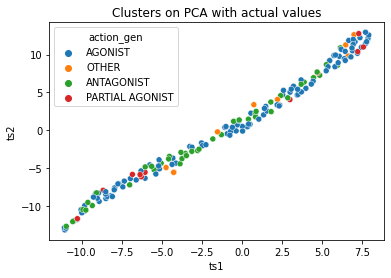

In [135]:
tsne = TSNE(n_components=2, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_moldesc_scaled.iloc[:, :-1])
# tsne_results = tsne.fit_transform(X_selected.iloc[:, :-1])

tsne_results = pd.DataFrame(tsne_results, columns=['ts1', 'ts2'])
sns.scatterplot(x='ts1', y="ts2", hue=df['action_gen'], data=tsne_results)
plt.title('Clusters on PCA with actual values')
plt.show()

## PCA before clustering

c:\Users\fongm\Anaconda3\envs\m2vec\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

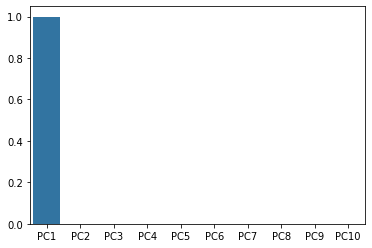

In [136]:
# scaler = StandardScaler()
# df_moldesc_scaled = scaler.fit_transform(df_moldesc.iloc[:, 2:])

df_moldesc_scaled = df_moldesc.iloc[:, 2:]

pca = PCA().fit(df_moldesc_scaled)
pc = pca.transform(df_moldesc_scaled)

# var = pca.explained_variance_[:10] / sum(pca.explained_variance_)
labels = ['PC'+ str(i) for i in range(1,11)]

# print(sum(pca.explained_variance_))
sns.barplot(labels, pca.explained_variance_ratio_[:10])

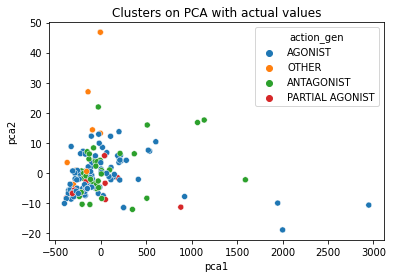

In [137]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(df_moldesc_scaled)
results = pd.DataFrame(reduced_data, columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df_moldesc['action_gen'], data=results)
plt.title('Clusters on PCA with actual values')
plt.show()

In [138]:
clustering_kmeans = KMeans(n_clusters=4)
results['clusters'] = clustering_kmeans.fit_predict(results)
results['clusters']

0      3
1      3
2      3
3      3
4      3
      ..
166    3
167    3
168    0
169    0
170    0
Name: clusters, Length: 171, dtype: int32

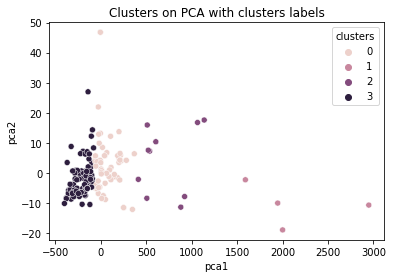

In [139]:
sns.scatterplot(x="pca1", y="pca2", hue=results['clusters'], data=results)
plt.title('Clusters on PCA with clusters labels')
plt.show()

In [140]:
print(results['clusters'].value_counts())
# sort keys based on number of values in each clusters
cluster_dict = dict(results['clusters'].value_counts())
cluster_dict = dict(sorted(cluster_dict.items(), key=lambda item: item[1], reverse=True)).keys()
cluster_dict = list(cluster_dict)

results['action_gen'] = df['action_gen']
results['action_gen_cluster'] = results['clusters'].map({cluster_dict[0]: 'AGONIST', cluster_dict[1]: 'ANTAGONIST', cluster_dict[2]: 'PARTIAL AGONIST', cluster_dict[3]: 'OTHER'})

print('pairing_score: ', rand_score(results.action_gen, results.action_gen_cluster))
results[results.action_gen == results.action_gen_cluster].shape[0] / results.shape[0]
# print('Accuracy', accuracy_score(results.action_gen, results.action_gen_cluster))
print(classification_report(results.action_gen, results.action_gen_cluster))


3    96
0    61
2    10
1     4
Name: clusters, dtype: int64
pairing_score:  0.5140694874441004
                 precision    recall  f1-score   support

        AGONIST       0.68      0.60      0.64       108
     ANTAGONIST       0.30      0.42      0.35        43
          OTHER       0.00      0.00      0.00         9
PARTIAL AGONIST       0.10      0.09      0.10        11

       accuracy                           0.49       171
      macro avg       0.27      0.28      0.27       171
   weighted avg       0.51      0.49      0.50       171



## Cluster directly

In [141]:
clustering_kmeans = KMeans(n_clusters=4)
df_moldesc['clusters'] = clustering_kmeans.fit_predict(df_moldesc_scaled)
df_moldesc['clusters']

0      0
1      0
2      0
3      0
4      0
      ..
166    0
167    0
168    3
169    3
170    3
Name: clusters, Length: 171, dtype: int32

In [142]:
print(df_moldesc['clusters'].value_counts())
# sort keys based on number of values in each clusters
cluster_dict = dict(df_moldesc['clusters'].value_counts())
cluster_dict = dict(sorted(cluster_dict.items(), key=lambda item: item[1], reverse=True)).keys()
cluster_dict = list(cluster_dict)

df_moldesc['action_gen'] = df['action_gen']
df_moldesc['action_gen_cluster'] = df_moldesc['clusters'].map({cluster_dict[0]: 'AGONIST', cluster_dict[1]: 'ANTAGONIST', cluster_dict[2]: 'PARTIAL AGONIST', cluster_dict[3]: 'OTHER'})

print('pairing_score: ', rand_score(df_moldesc.action_gen, df_moldesc.action_gen_cluster))
df_moldesc[df_moldesc.action_gen == df_moldesc.action_gen_cluster].shape[0] / df_moldesc.shape[0]
# print('Accuracy', accuracy_score(df_moldesc.action_gen, df_moldesc.action_gen_cluster))
print(classification_report(df_moldesc.action_gen, df_moldesc.action_gen_cluster))


0    99
3    58
2    10
1     4
Name: clusters, dtype: int64
pairing_score:  0.5198486412108703
                 precision    recall  f1-score   support

        AGONIST       0.69      0.63      0.66       108
     ANTAGONIST       0.31      0.42      0.36        43
          OTHER       0.00      0.00      0.00         9
PARTIAL AGONIST       0.10      0.09      0.10        11

       accuracy                           0.51       171
      macro avg       0.27      0.28      0.28       171
   weighted avg       0.52      0.51      0.51       171



In [143]:
df['action_gen'].value_counts()

AGONIST            108
ANTAGONIST          43
PARTIAL AGONIST     11
OTHER                9
Name: action_gen, dtype: int64